## Análise das Notas da Redação do Enem 2019

Todos os anos a redação do Exame Nacional do Ensino Médio (Enem) dá o que falar, tanto antes quanto depois da prova. Para os que vão realizar a prova, as especulações sobre o possível tema e as dicas de como escrever um bom texto são os assuntos mais frequentes. Depois do Enem, a discussão gira em torno da relevância do tema da redação e nível de dificuldade para os participantes.    

Em 2019, o tema da redação foi: **"Democratização do acesso ao cinema no Brasil"**

Vamos analisar como os estudantes se saíram? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('D:\Alura\microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1')
data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


In [3]:
data.shape

(5095270, 136)

In [4]:
dados_enem = data[['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
                   'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'NO_MUNICIPIO_NASCIMENTO',
                   'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
                   'IN_TREINEIRO', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
                   'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                   'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 
                   'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q006', 'Q024', 'Q025']]

In [5]:
# Exclui notas de redação NaN (inscritos ausentes/eliminados)
dados_enem.dropna(subset=['NU_NOTA_REDACAO'], inplace=True)

In [6]:
# Total de redações
dados_enem['NU_NOTA_REDACAO'].shape

(3923144,)

### Distribuição das Notas

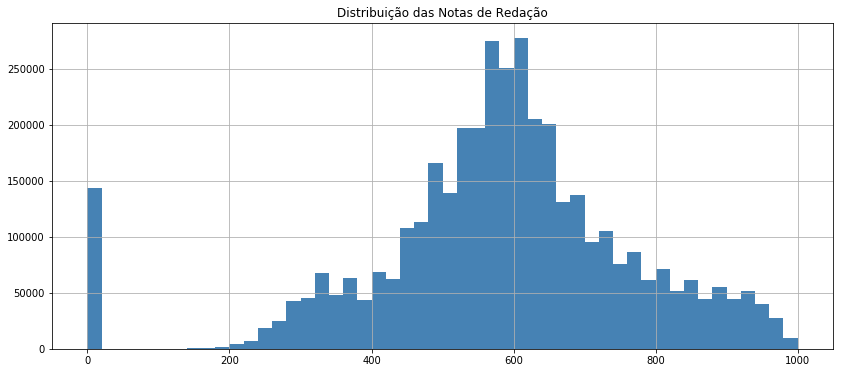

In [7]:
dados_enem['NU_NOTA_REDACAO'].hist(bins=50, figsize = (14,6), color='steelblue')
plt.title('Distribuição das Notas de Redação')
plt.show()

In [8]:
def plot_notas(feature, titulo):
    order = dados_enem[feature].unique()
    order.sort()
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=feature, y = "NU_NOTA_REDACAO", data=dados_enem, order=order, palette="vlag")
    plt.title(f"Notas da Redação do Enem por {titulo}")
    plt.show()

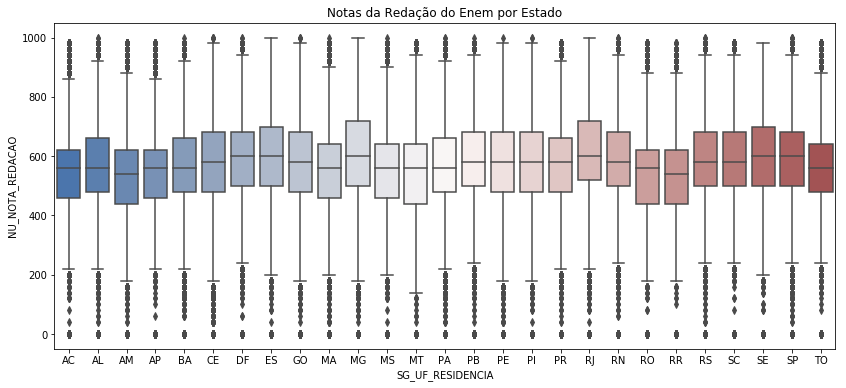

In [9]:
plot_notas('SG_UF_RESIDENCIA', 'Estado')

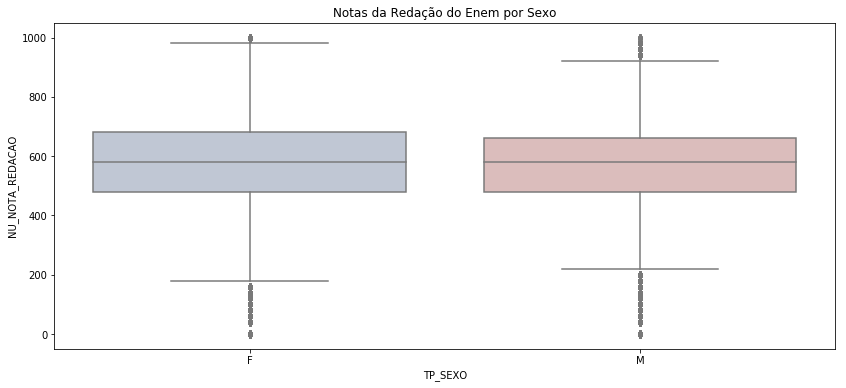

In [10]:
plot_notas('TP_SEXO', 'Sexo')

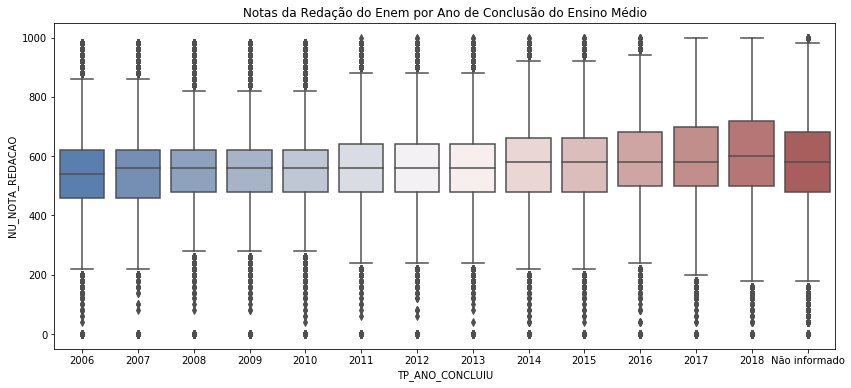

In [11]:
dados_enem['TP_ANO_CONCLUIU'].replace({0: 'Não informado', 1:'2018', 2:'2017', 3:'2016', 4:'2015',
                                       5: '2014', 6: '2013', 7: '2012', 8:'2011', 9:'2010', 10: '2009',
                                       11: '2008', 12:'2007', 13:'2006'}, inplace=True) 

plot_notas('TP_ANO_CONCLUIU', 'Ano de Conclusão do Ensino Médio')

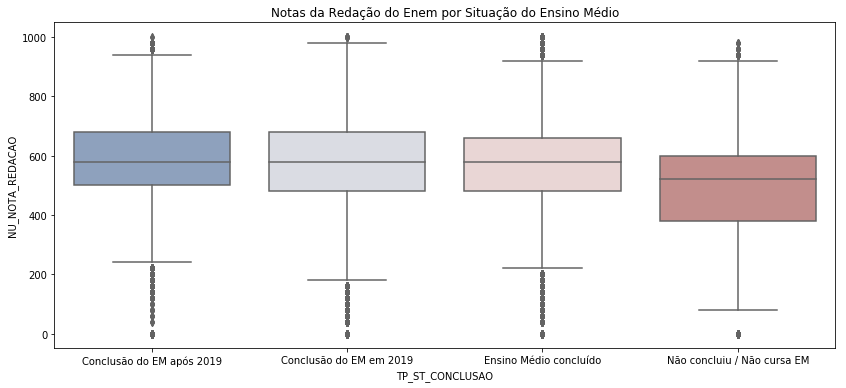

In [12]:
dados_enem['TP_ST_CONCLUSAO'].replace({1:'Ensino Médio concluído', 2:'Conclusão do EM em 2019',
                                       3:'Conclusão do EM após 2019', 4:'Não concluiu / Não cursa EM'}, inplace=True) 
plot_notas('TP_ST_CONCLUSAO', 'Situação do Ensino Médio')

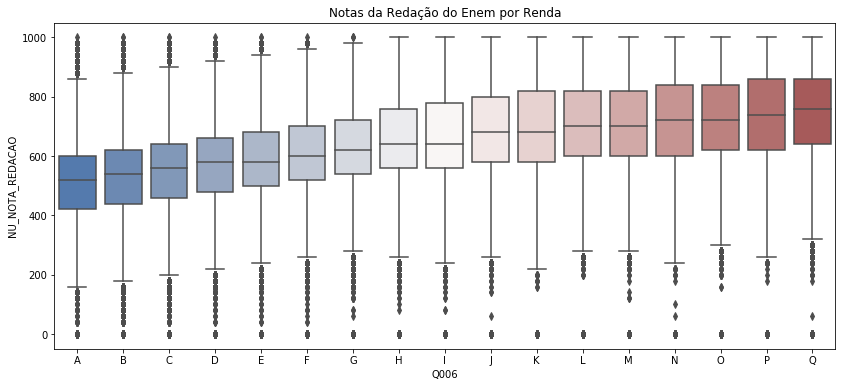

Legenda:
A. Nenhuma renda 
B. Até R$ 998,00 
C. De R$ 998,01 até R$ 1.497,00 
D. De R$ 1.497,01 até R$ 1.996,00 
E. De R$ 1.996,01 até R$ 2.495,00 
F. De R$ 2.495,01 até R$ 2.994,00 
G. De R$ 2.994,01 até R$ 3.992,00 
H. De R$ 3.992,01 até R$ 4.990,00 
I. De R$ 4.990,01 até R$ 5.988,00 
J. De R$ 5.988,01 até R$ 6.986,00 
K. De R$ 6.986,01 até R$ 7.984,00 
L. De R$ 7.984,01 até R$ 8.982,00 
M. De R$ 8.982,01 até R$ 9.980,00 
N. De R$ 9.980,01 até R$ 11.976,00
O. De R$ 11.976,01 até R$ 14.970,00 
P. De R$ 14.970,01 até R$ 19.960,00 
Q. Mais de R$ 19.960,00


In [13]:
plot_notas('Q006', 'Renda')

print("Legenda:")
print("A. Nenhuma renda \nB. Até R$ 998,00 \nC. De R$ 998,01 até R$ 1.497,00 \nD. De R$ 1.497,01 até R$ 1.996,00 \
\nE. De R$ 1.996,01 até R$ 2.495,00 \nF. De R$ 2.495,01 até R$ 2.994,00 \nG. De R$ 2.994,01 até R$ 3.992,00 \
\nH. De R$ 3.992,01 até R$ 4.990,00 \nI. De R$ 4.990,01 até R$ 5.988,00 \nJ. De R$ 5.988,01 até R$ 6.986,00 \
\nK. De R$ 6.986,01 até R$ 7.984,00 \nL. De R$ 7.984,01 até R$ 8.982,00 \nM. De R$ 8.982,01 até R$ 9.980,00 \
\nN. De R$ 9.980,01 até R$ 11.976,00\nO. De R$ 11.976,01 até R$ 14.970,00 \nP. De R$ 14.970,01 até R$ 19.960,00 \
\nQ. Mais de R$ 19.960,00")

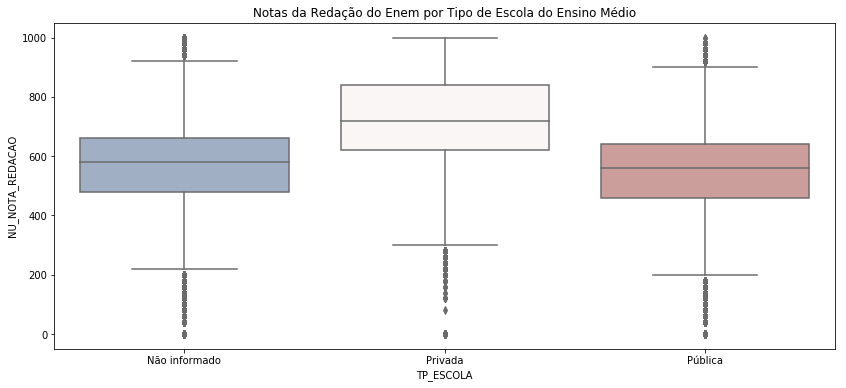

In [14]:
dados_enem['TP_ESCOLA'].replace({1: 'Não informado', 2:'Pública', 3:'Privada'}, inplace=True)
plot_notas('TP_ESCOLA', 'Tipo de Escola do Ensino Médio')

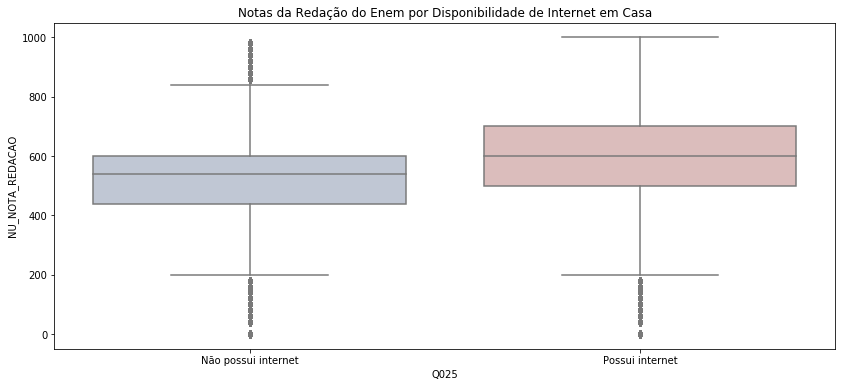

In [15]:
dados_enem['Q025'].replace({'A': 'Não possui internet', 'B':'Possui internet'}, inplace=True)
plot_notas('Q025', 'Disponibilidade de Internet em Casa')

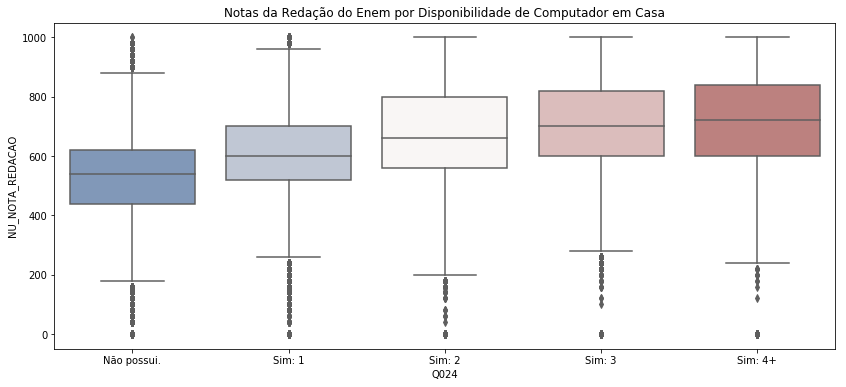

In [16]:
dados_enem['Q024'].replace({'A': 'Não possui.', 'B':'Sim: 1', 'C':'Sim: 2', 'D':'Sim: 3', 'E':'Sim: 4+'}, inplace=True) 
plot_notas('Q024', 'Disponibilidade de Computador em Casa')

----

No Enem 2019, foram produzidas **quase 4 milhões de redações**. A maioria dos estudantes que fizeram o Enem tiveram a nota da redação na faixa **entre 500 e 700 pontos**. No entanto, ao analisarmos as notas, é possível identificar fatores que influenciam o desempenho dos estudantes na redação: 
- Estudantes que concluíram o Ensino Médio recentemente, entre 2017 e 2018, e os que concluem em 2019, tiveram notas melhores.
- Dos que declararam o tipo de escola do Ensino Médio, as notas mais altas foram de estudantes provenientes de Escolas Privadas.
- Ao analisarmos a distribuição de notas por renda, o gráfico mostra claramente que, em média, quanto maior a renda, maiores as notas. 
- Essa diferença se reflete também entre as notas de estudantes que possuem internet e computador em casa - aqueles/as que não possuem  tiveram, em média, notas mais baixas. 

---

## **Como são corrigidas as Redações do Enem?**

Cada redação é corrigida por **dois avaliadores** que analisam o desempenho dos estudantes de acordo com as **5 competências**, que valem de 0 a 200 pontos. Um avaliador não tem conhecimento da nota atribuída pelo outro e a nota final é a média aritmética dessas duas avaliações. Ao contrário das outras disciplinas do Enem, a redação possui nota máxima: 1000 pontos.    

In [17]:
# substitui a descrição
dados_enem['TP_STATUS_REDACAO'].replace({1:'Sem problemas', 2:'Anulada', 3:'Cópia Texto Motivador', 4:'Em Branco',
                                      6:'Fuga ao tema', 7:'Não atendimento ao tipo textual', 8:'Texto insuficiente',
                                      9:'Parte desconectada'}, inplace=True) 

In [18]:
# seleciona os dados da redação
redacao = dados_enem[['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
                      'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'TP_STATUS_REDACAO']]

redacao.head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_STATUS_REDACAO
0,160.0,160.0,160.0,140.0,160.0,780.0,Sem problemas
1,120.0,120.0,120.0,120.0,120.0,600.0,Sem problemas
2,140.0,120.0,120.0,140.0,120.0,640.0,Sem problemas
5,120.0,200.0,140.0,120.0,0.0,580.0,Sem problemas
6,80.0,100.0,80.0,80.0,20.0,360.0,Sem problemas


**Curiosidade:** As correções são feitas numa plataforma online, na qual o avaliador recebe os textos sem identificação. Cada avaliador recebe até 200 redações por dia e deve avaliar mais de 150 textos a cada três dias!     
    

#### Status das Redações

In [19]:
redacao['TP_STATUS_REDACAO'].value_counts(normalize=True)

Sem problemas                      0.963374
Em Branco                          0.014504
Fuga ao tema                       0.010355
Cópia Texto Motivador              0.005930
Texto insuficiente                 0.002187
Anulada                            0.001442
Parte desconectada                 0.001240
Não atendimento ao tipo textual    0.000969
Name: TP_STATUS_REDACAO, dtype: float64

### **Composição das Notas**

In [20]:
comp_redacao = redacao[redacao['TP_STATUS_REDACAO'] == 'Sem problemas']

**Notas da competência 1**    
Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.

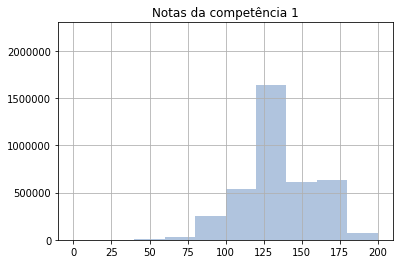

In [21]:
def plot_nota_comp(nota, comp):
    comp_redacao[nota].hist(color='lightsteelblue')
    plt.title(f'Notas da competência {comp}')
    plt.ylim(0, 2300000)
    plt.show()
    
plot_nota_comp('NU_NOTA_COMP1', 1)

In [22]:
def resumo_comp(x):
    print ('Nota média da competência:', comp_redacao[x].mean())
    print()
    print('Total de notas Máx.:', comp_redacao.NU_NOTA_COMP1[comp_redacao[x]==200].count())
    print('Total de notas Zero:', comp_redacao.NU_NOTA_COMP1[comp_redacao[x]==0].count())

resumo_comp('NU_NOTA_COMP1')

Nota média da competência: 125.05809964664218

Total de notas Máx.: 7738
Total de notas Zero: 179


**Notas da competência 2**    
Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.

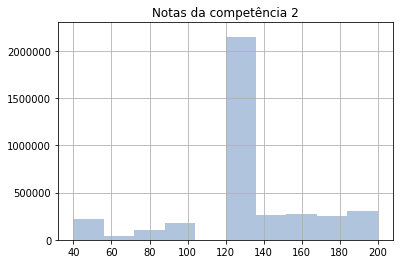

In [23]:
plot_nota_comp('NU_NOTA_COMP2', 2)

In [24]:
resumo_comp('NU_NOTA_COMP2')

Nota média da competência: 127.40282924389892

Total de notas Máx.: 308218
Total de notas Zero: 0


**Notas da competência 3**    
Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.

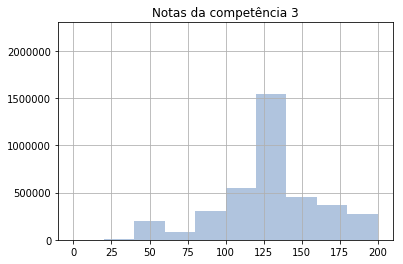

In [25]:
plot_nota_comp('NU_NOTA_COMP3', 3)

In [26]:
resumo_comp('NU_NOTA_COMP3')

Nota média da competência: 119.17814605544979

Total de notas Máx.: 98964
Total de notas Zero: 381


**Notas da competência 4**    
Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.

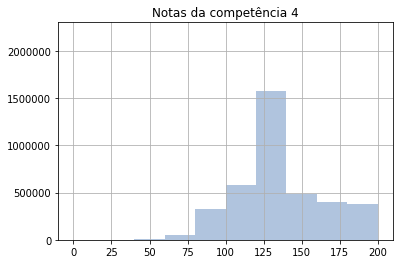

In [27]:
plot_nota_comp('NU_NOTA_COMP4', 4)

In [28]:
resumo_comp('NU_NOTA_COMP4')

Nota média da competência: 126.2527322060985

Total de notas Máx.: 171544
Total de notas Zero: 287


**Notas da competência 5**    
Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.

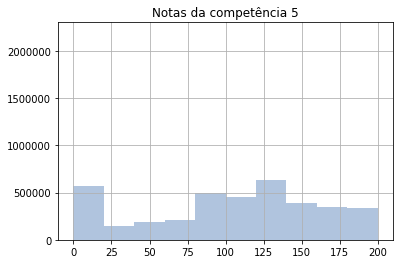

In [29]:
plot_nota_comp('NU_NOTA_COMP5', 5)

In [30]:
resumo_comp('NU_NOTA_COMP5')

Nota média da competência: 95.01223324526948

Total de notas Máx.: 155026
Total de notas Zero: 569952


----
As competências 1, 2 e 4 concentraram as maiores médias. Os estudantes tiveram **melhor desempenho na Competência 2**(desenvolvimento do tema), com maior número de notas máximas e nenhuma nota zero. Já a Competência 5 (proposta de intervenção para o problema) foi a de maior dificuldade com **quase 600 mil notas zero**. 


---

## **Nota 0 x Nota 1000**

Das quase 4 milhões de redações produzidas, pouco mais de 140 mil redações foram zeradas ou anuladas, enquanto que apenas **53 redações** atingiram a nota máxima. 

In [31]:
# total de notas 0 na redação
redacao_zero = dados_enem[dados_enem['NU_NOTA_REDACAO'] == 0]
redacao_zero.shape

(143689, 36)

In [32]:
# situação das redações zeradas
redacao_zero['TP_STATUS_REDACAO'].value_counts(normalize=True)

Em Branco                          0.396001
Fuga ao tema                       0.282715
Cópia Texto Motivador              0.161912
Texto insuficiente                 0.059698
Anulada                            0.039384
Parte desconectada                 0.033844
Não atendimento ao tipo textual    0.026446
Name: TP_STATUS_REDACAO, dtype: float64

In [40]:
# Total de notas 1000 na redação
redacao_max = dados_enem[dados_enem['NU_NOTA_REDACAO'] == 1000]
redacao_max.shape

(53, 36)

---

** Acesso à internet e computador ** 

O acesso a recursos como internet e computador em casa tem impacto no desempenho do estudante na redação? 

* Entre estudantes com as notas zeradas, **63% não possui computador em casa** e 33% não possui internet. 
* Entre os que tiraram nota máxima, 2 estudantes (0,04%) não possuem computador em casa e **todos possuem acesso à internet**. 

In [37]:
# Notas 0 - Possui acesso a internet em casa?
redacao_zero['Q025'].value_counts(normalize=True)

Possui internet        0.660044
Não possui internet    0.339956
Name: Q025, dtype: float64

In [48]:
# Notas 1000 - Possui acesso a internet em casa?
redacao_max['Q025'].value_counts(normalize=True)

Possui internet    1.0
Name: Q025, dtype: float64

In [50]:
# Notas 0 - Possui computador em casa? 
redacao_zero['Q024'].value_counts(normalize=True)

Não possui.    0.632352
Sim: 1         0.321222
Sim: 2         0.034728
Sim: 3         0.008372
Sim: 4+        0.003327
Name: Q024, dtype: float64

In [54]:
# Notas 1000 - Possui computador em casa? 
redacao_max['Q024'].value_counts(normalize=True)

Sim: 1         0.471698
Sim: 3         0.226415
Sim: 2         0.226415
Não possui.    0.037736
Sim: 4+        0.037736
Name: Q024, dtype: float64

-----

Considerando o cenário de pandemia durante o ano de 2020, recomenda-se um novo estudo comparativo para análise do impacto do acesso à internet e computador nas notas do Enem 2020. 

In [55]:
# Author: Priscilla Bomfim (@priscillapreks) 
# Imersão Dados Alura - 2020